# Bank Marketing

**Description of the variables in the dataset:**

*Bank client data:*

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'primary', 'secondary', 'tertiary', 'unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. using: has housing loan? (categorical: 'no','yes','unknown')
7. balance: bank balance
8. loan: has personal loan? (categorical: 'no','yes','unknown')

*Related with the last contact of the current campaign:*

9. contact: contact communication type (categorical: 'cellular','telephone')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*Other attributes:*

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

*Social and economic context attributes: (ver additional mới bổ sung)*

17. emp.var.rate: employment variation rate - quarterly indicator (numeric)
18. cons.price.idx: consumer price index - monthly indicator (numeric)
19. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
20. euribor3m: euribor 3 month rate - daily indicator (numeric)
21. nr.employed: number of employees - quarterly indicator (numeric)

*Output variable (desired target):*

y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## **Import and understand data**

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!unzip bank.zip
df = pd.read_csv('bank-full.csv', sep=';')
df.head(10)

--2023-04-23 06:30:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K  1.73MB/s    in 0.3s    

2023-04-23 06:30:08 (1.73 MB/s) - ‘bank.zip’ saved [579043/579043]

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### Verify the null values

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Verify the duplicated values

In [ ]:
df.duplicated().sum()

0

### Statistical summary of the dataset

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- Từ bảng trên chúng ta có thể nhìn ra được một vài thông tin cơ bản như là độ tuổi trung bình của các khách hàng là 41 trong đó khách hàng trẻ nhất là 18 tuổi, khách hàng già nhất là 95 tuổi
- `mean(balance)` có giá trị là 1326 trong khi độ lệch chuẩn rất cao là 3044 chứng tỏ giá trị này được phân bố trên một khoảng dữ liệu rất lớn trên toàn bộ tập dữ liệu 

### Dataset variable types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Có thể thấy bộ dữ liệu của chúng ta không có bất cứ dữ liệu nào bị mất mát, điều này giúp cho việc khám phá dữ liệu cũng như huấn luyện mô hình phần nào đó dễ dàng hơn. Tiếp theo ta trực quan hóa dữ liệu để khám phá dữ liệu tốt hơn.


## **Exploratory Data Analysis (EDA)**

### Check balance of all data

<Axes: ylabel='y'>

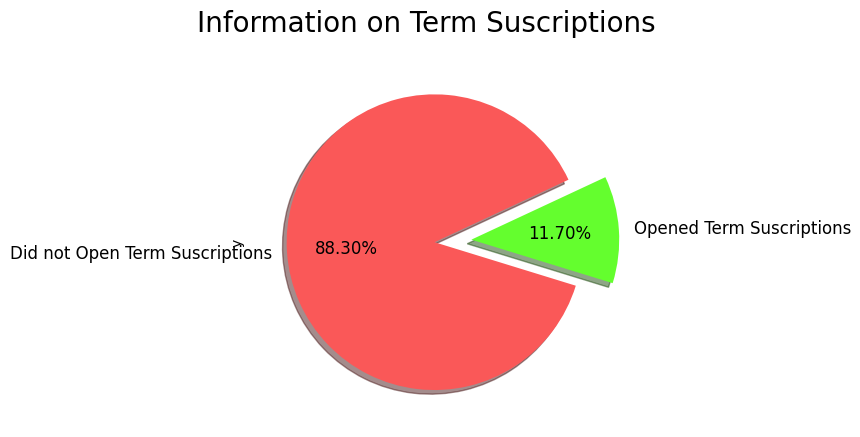

In [ ]:
colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


Có thể dễ dàng thấy được số người không tham gia chiếm phần lớn và gấp 8 lần số người có tham gia. Giờ ta sẽ tiếp tục khám phá sâu hơn về các thông tin trong bộ dữ liệu
Ta sẽ bắt đầu với dữ liệu dạng 'numerical' trước

### Numeric Data Type Analysis

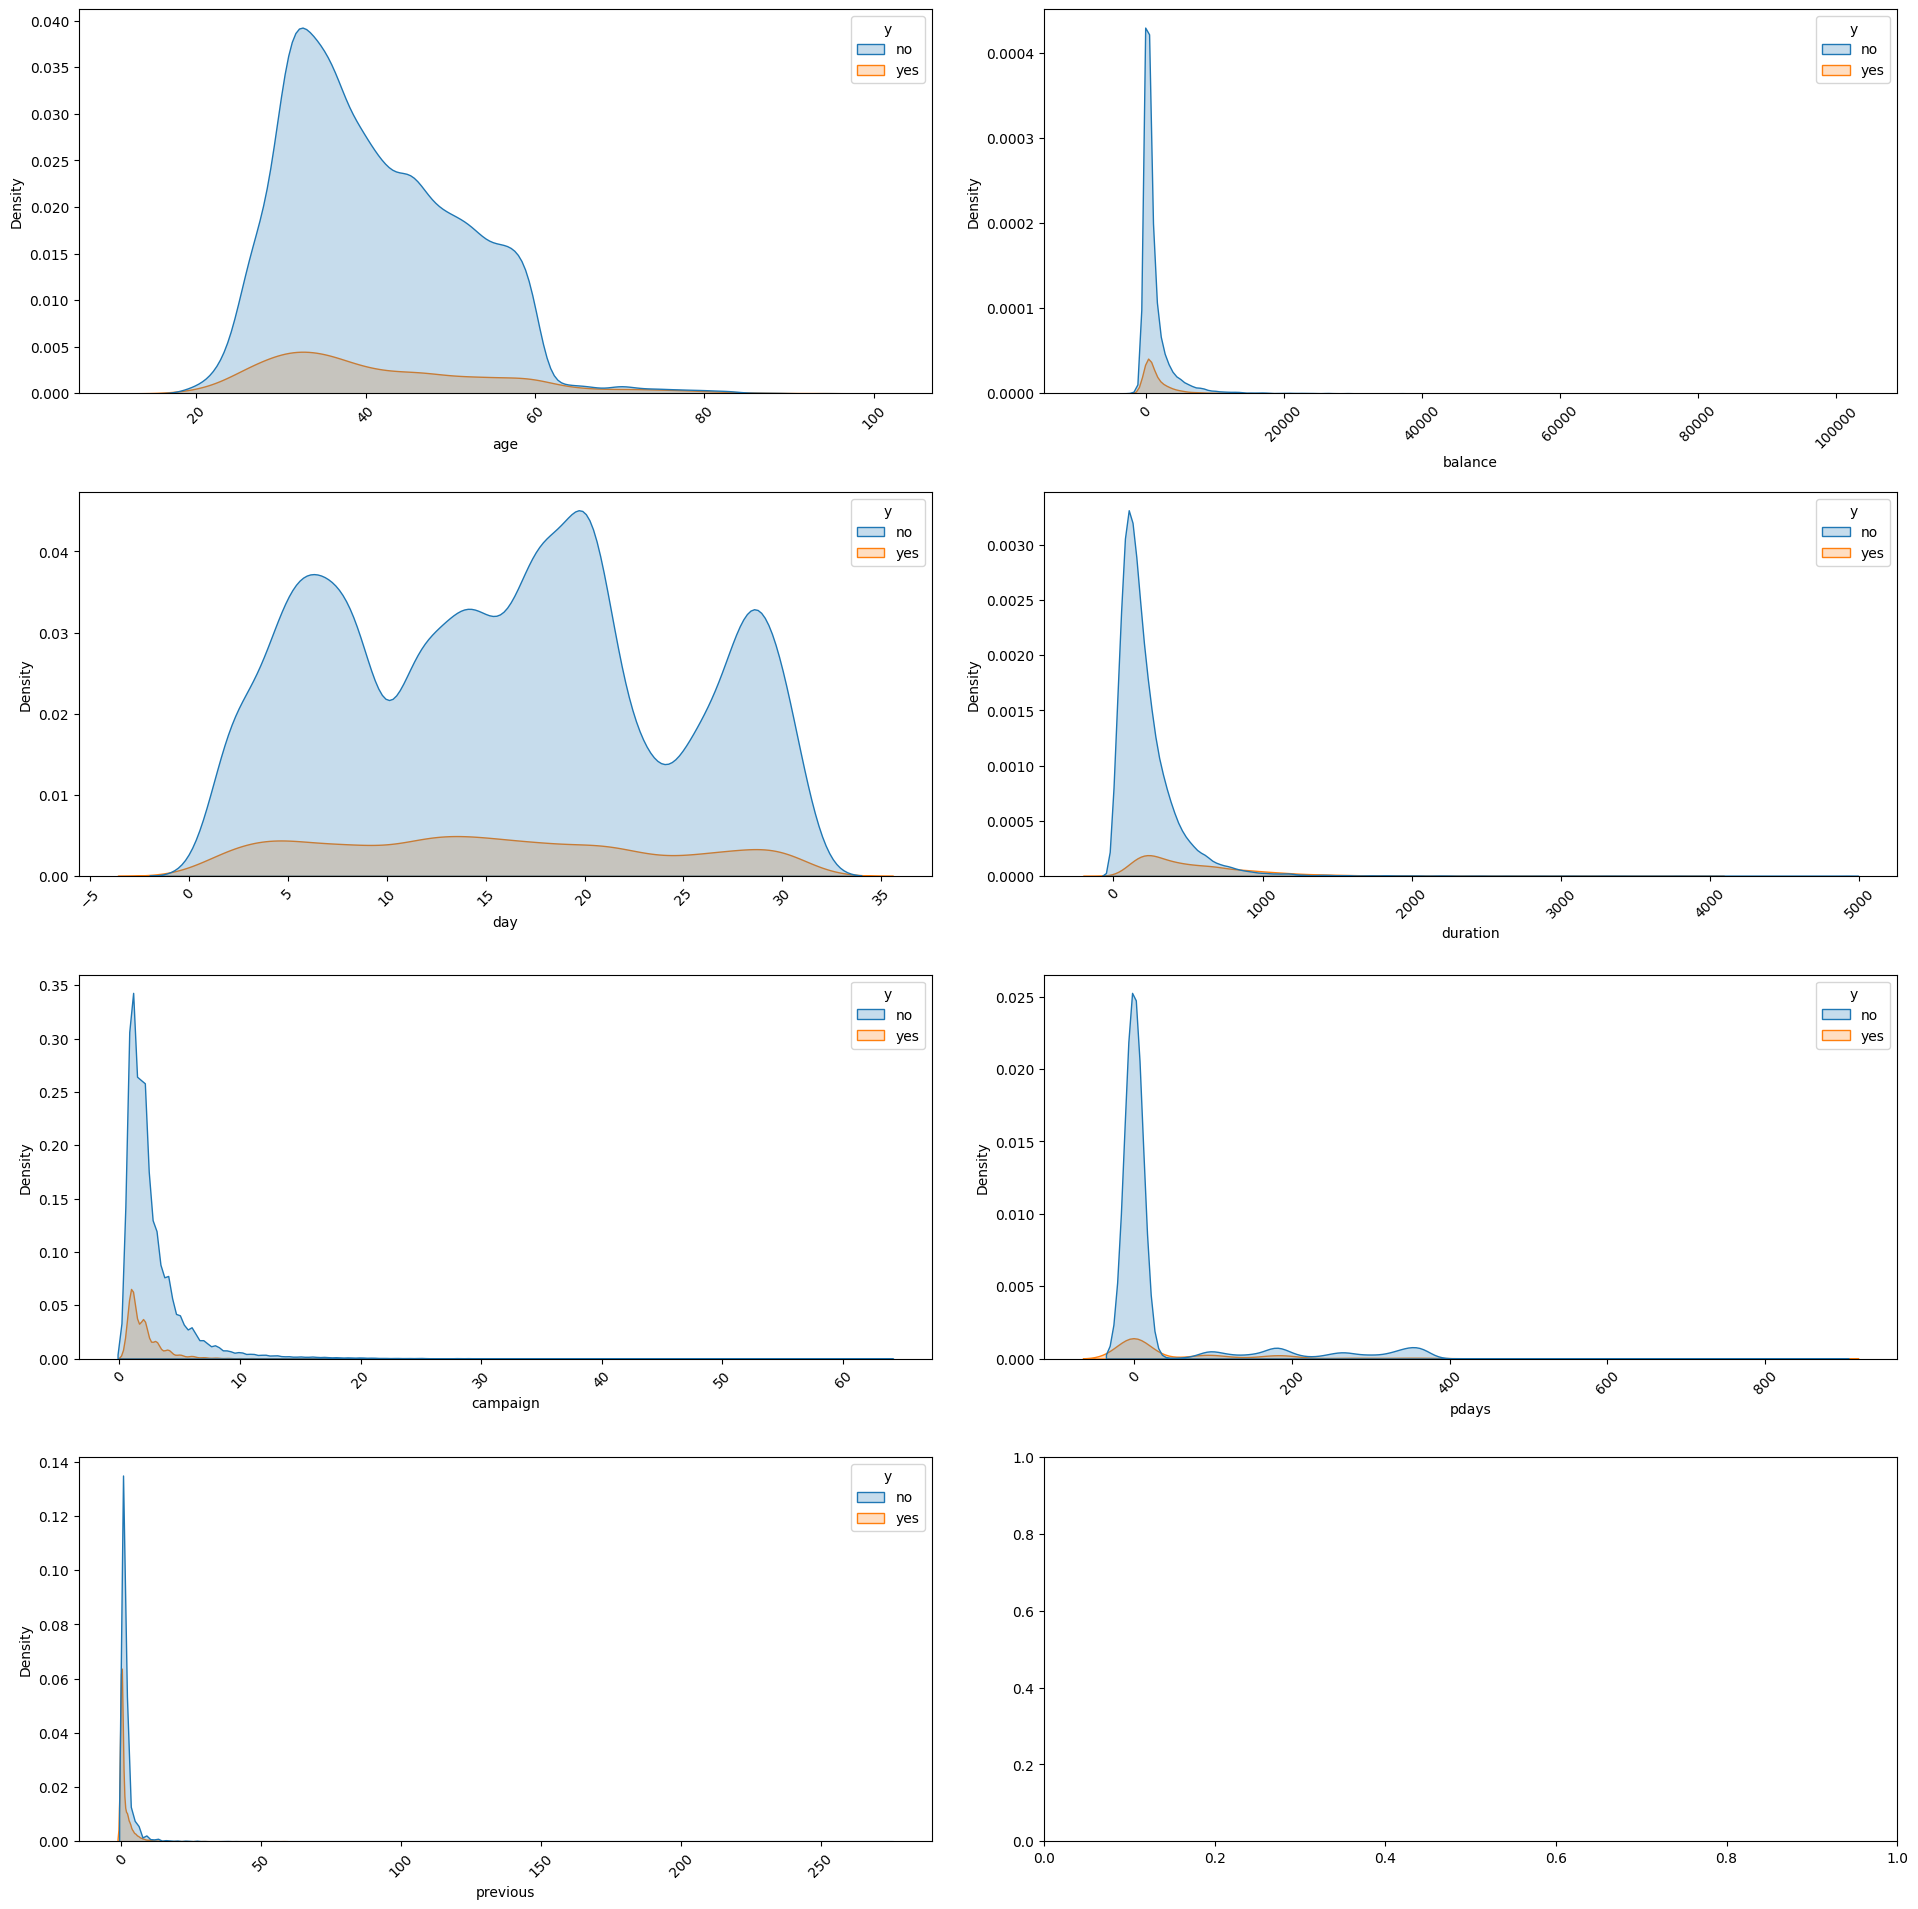

In [ ]:
colonnes_int = df.select_dtypes('number').columns
fig, axes = plt.subplots(4,2, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(colonnes_int, axes.flatten()):
    sns.kdeplot(x=col,data=df, hue='y', ax=ax, fill=True)
    ax.tick_params(axis='x', rotation=45)

plt.savefig('kdeplot.jpg', dpi = 600)

Ta có thể dễ dàng thấy được là giá trị của `previous` là như nhau trong cả bộ dữ liệu nên ta có thể bỏ qua thông tin này, ngoài ra thông tin về `day` là ngày trong tháng cũng không có quá nhiều ý nghĩa nên ta cũng có thể không quan tâm. Ta sẽ tìm hiểu sâu hơn ở các thông tin khác

In [ ]:
fig=px.box(df, x='y', y='age', color='y',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'], title='<b>Distribution of age based on Term Deposit Status')
fig.update_layout(title_x=0.5, font_family="Times New Roman", legend_title_text="<b>Term Deposit")
fig.show()

Đầu tiên là về `age`, ta thấy sự khác biệt giữa các độ tuổi ở cả 2 kết quả khá tương đồng nhau và không có quá nhiều sự khác biệt

In [ ]:
fig=px.box(df,x='y',y='duration',color='y',template='simple_white',color_discrete_sequence=['LightCoral','YellowGreen'],title='<b>Effect of Duration on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

Ta có thể thấy những điểm dữ liệu có giá trị `duration` trên 3500 chỉ là 3 điểm nên ta có thể coi đây là những điểm ngoại lai và loại bỏ chúng sau này khi huấn luyện mô hình. Ngoài ra ta có thể dễ dàng thấy được là `duration` ảnh hưởng khá lớn đến kết quả đầu ra, cụ thể hơn ta có bảng dưới đây

In [ ]:
df['Duration'] = df['duration'].apply(lambda x: 'Above_Average_Duration' if x>=df['duration'].mean() else 'Below_Average_Duration')
a=df.groupby(['Duration','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Duration')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Duration',y='Count',text='percent',color='y',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Duration on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average duration and below average duration</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()

- Mặc dù số giá trị output là 'no' của cả những nhóm trên và dưới mức trung bình của `duration` đều lớn hơn 'yes' tuy nhiên ở nhóm nếu ở nhóm dưới mức trung bình thì số lượng người chọn 'no' áp đảo hoàn toàn với 95.2% thì ở nhóm trên mức trung bình thì số lượng người chọn 'no' chiếm tỉ lệ thấp hơn là 74.5% điều này phần nào phản ánh được là `duration` càng cao thì khách hàng sẽ có tỉ lệ đăng ký cao hơn

In [ ]:
df['Balance']=df['balance'].apply(lambda x: 'Above_Average' if x>=df['balance'].mean() else 'Below_Average')
a=df.groupby(['Balance','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Balance')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Balance',y='Count',text='percent',color='y',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Balance on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average balance and below average balance</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()

Ở đây tuy không rõ ràng như `duration` nhưng có thể phần nào cho ta được thông tin rằng `balance` cao thì vẫn sẽ cho tỉ lệ khách hàng đăng ký cao hơn so với `balance` thấp

In [ ]:
fig=px.line(df.groupby(['campaign','y'],as_index=False)['age'].count().rename(columns={'age':'Count'}),x='campaign',y='Count',color='y',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.08,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Campaign on Term Deposits<b><br><b style="font-family: Times New Roman; font-size:1vw">number of contacts performed during the campaign and for this client </b>')
fig.show()

Ở đây ta có thể nhận ra rằng càng thực hiện nhiều cuộc gọi thì số người chọn 'yes' có xu hướng giảm đi, điều này chỉ ra rằng chúng ta nên thực hiện ít cuộc gọi hơn để tăng tỉ lệ số khách hàng đăng ký tham gia

### Object Data Type Analysis

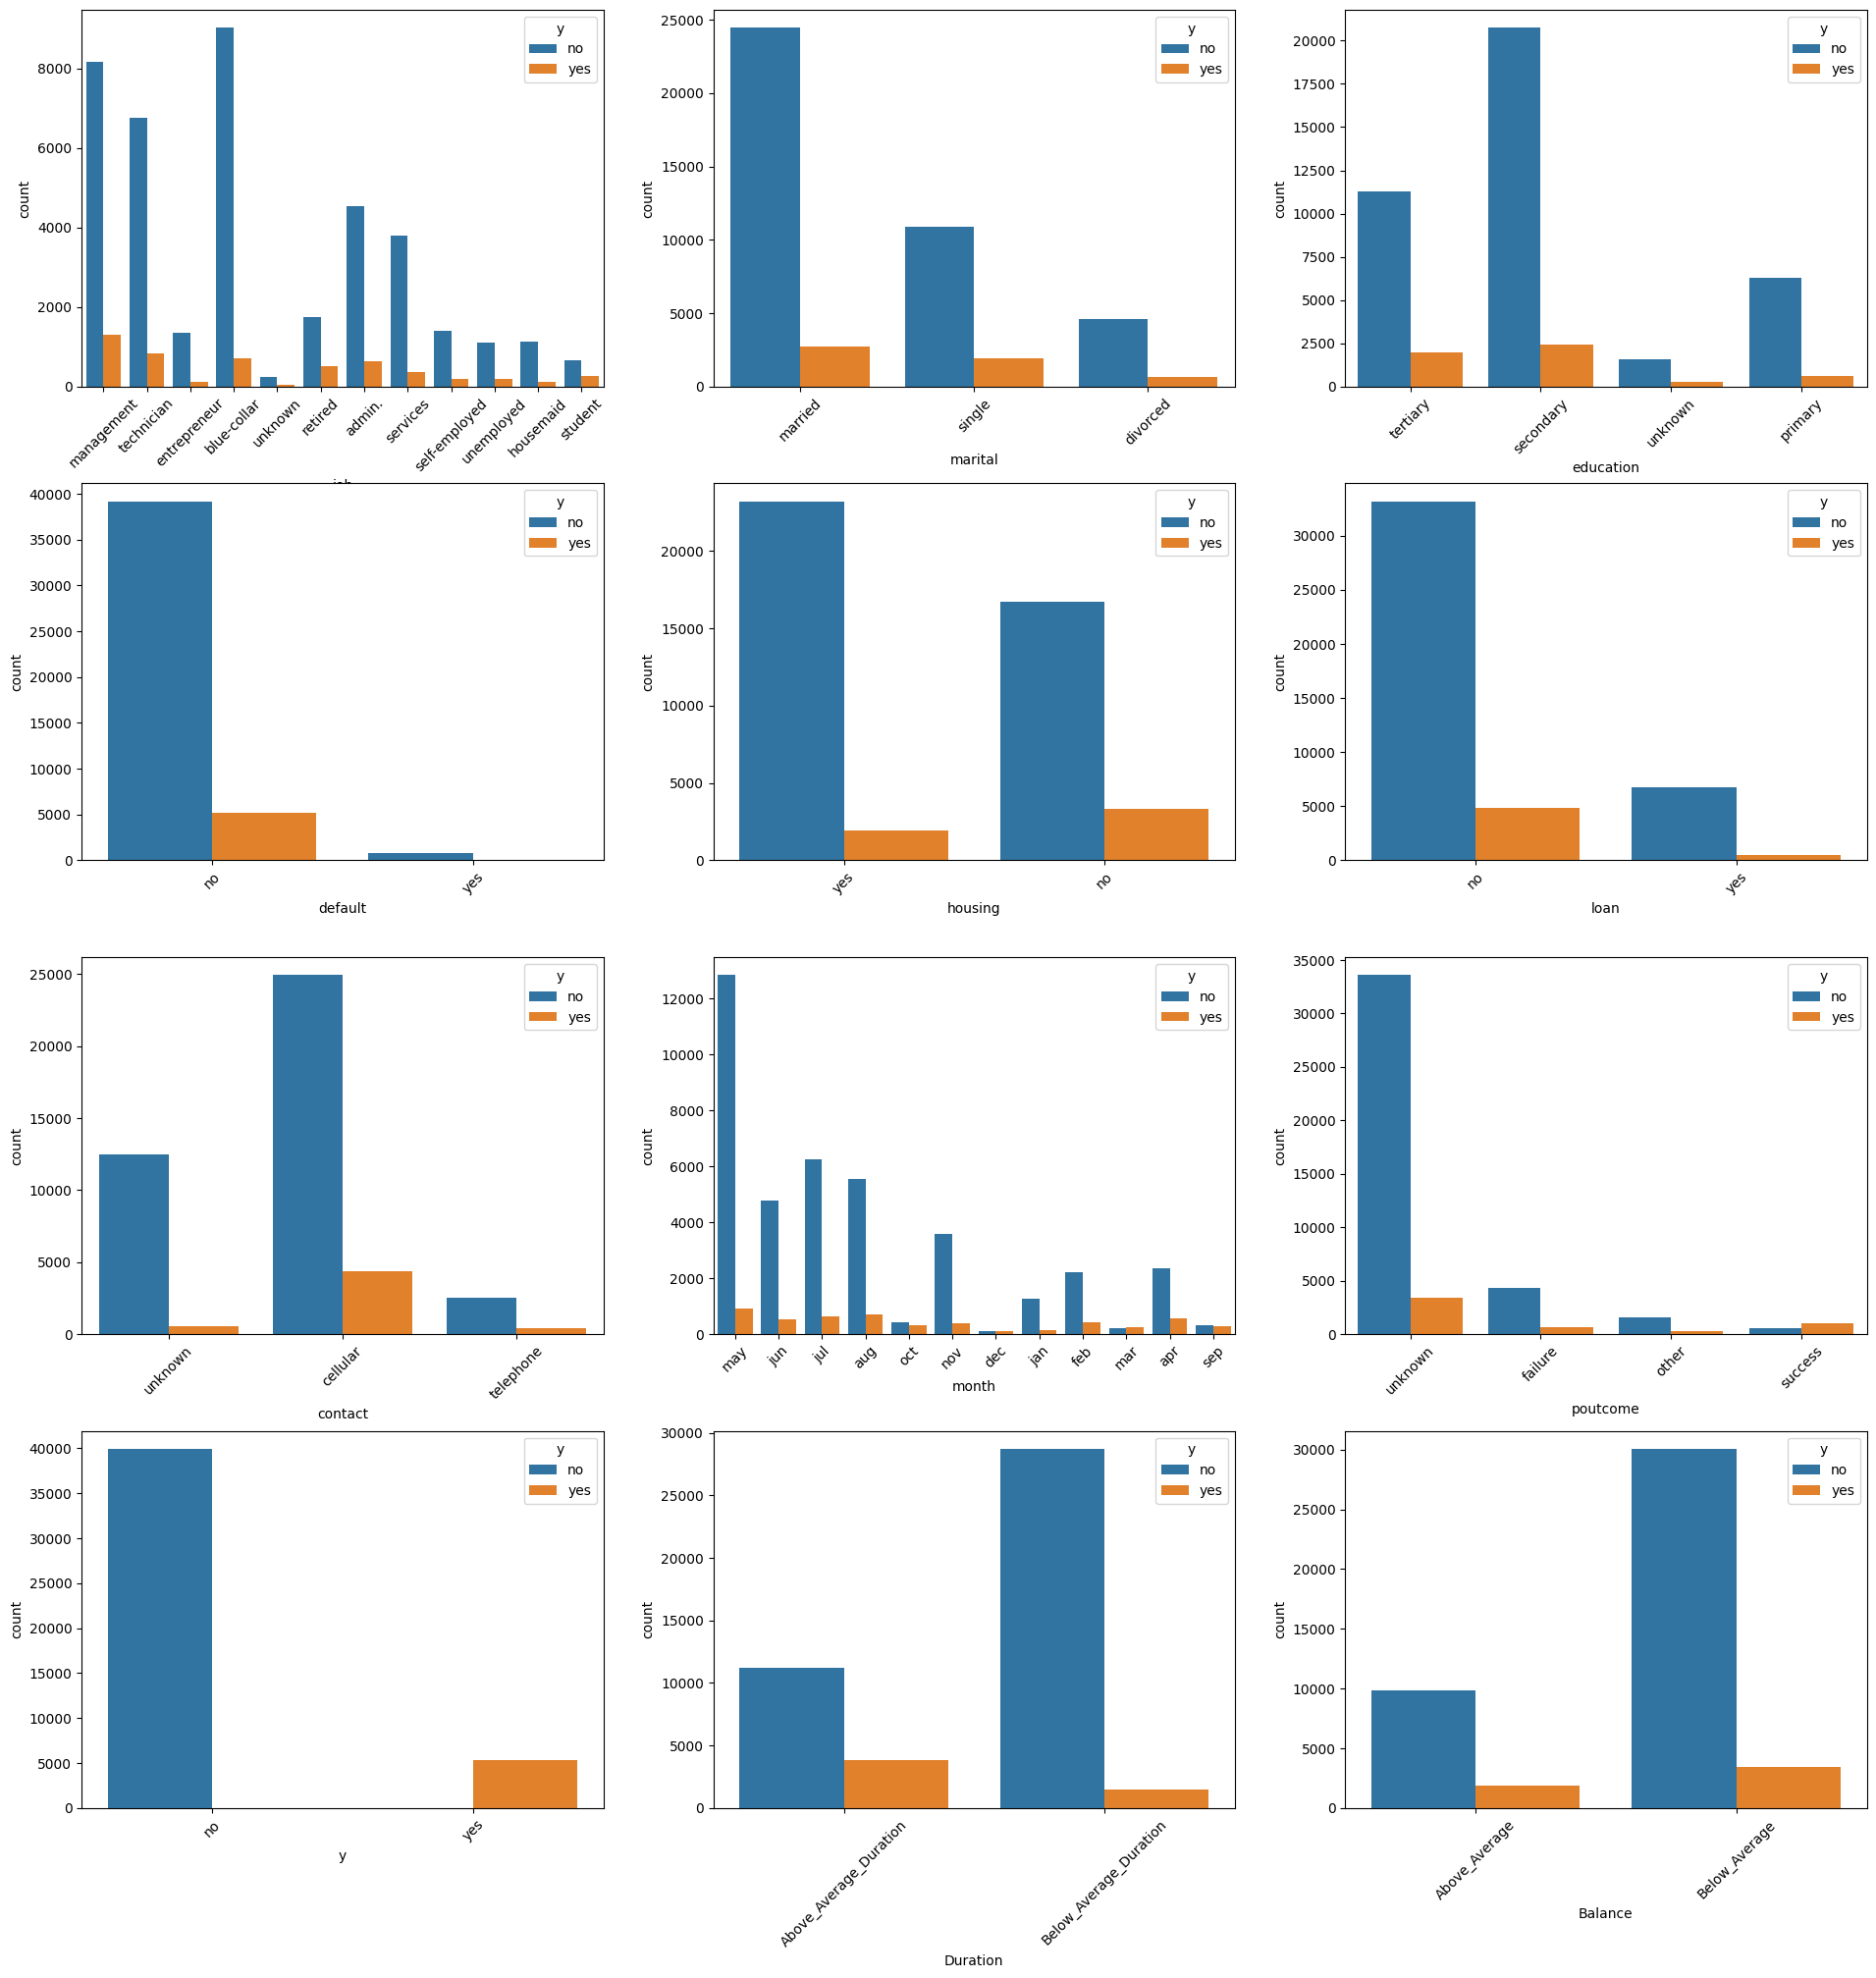

In [ ]:
colonnes_obj = df.select_dtypes('O').columns
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(colonnes_obj, axes.flatten()):
    sns.countplot(x=col, data=df, hue='y', ax=ax)
    ax.tick_params(axis='x', rotation=45)
plt.show()

Tiếp theo ta sẽ tiếp tục khảo sát các dữ liệu dạng 'categorical'. Đầu tiên sẽ là dữ liệu liên quan đến `Job`

In [ ]:
fig=px.bar(df.job.value_counts().reset_index().rename(columns={'index':'Job','job':'Count'}),x='Job',y='Count',color='Job',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Job type of the Customers',font_family="Times New Roman",title_font_family="Times New Roman")

2 nghề nghiệp phổ biến nhất trong tập dữ liệu đó là `blue-collar` và `management` trong khi `student` chiếm tỉ lệ thấp nhất không tính `unknown`

In [ ]:
a=df.groupby(['job','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('job')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='job',y='Count',text='percent',color='y',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Term Depositors based on Job Type</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

2 ngành nghề có tỉ lệ tham gia cao nhất là `retired` và `student` thuộc 2 thành phần có độ tuổi lần lượt là trẻ nhất và già nhất

In [ ]:
fig=px.pie(df.marital.value_counts().reset_index().rename(columns={'index':'Marital-Status','marital':'Count'}),names='Marital-Status',values='Count',hole=0.5,template='plotly_white',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Marital-Status')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

Tiếp đến chính là tình trạng hôn nhân ta có thể thấy phần lớn khách hàng của chúng ta đều đã kết hôn (chiếm tỉ lệ 60.2%)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
d = df.groupby(['marital','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig = go.Figure()
fig= make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Divorced', 'Married','Single'))

fig.add_trace(go.Pie(values=d[d['marital']=='divorced']['Count'],labels=d[d['marital']=='divorced']['y'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Divorced',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=d[d['marital']=='married']['Count'],labels=d[d['marital']=='married']['y'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Married',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=d[d['marital']=='single']['Count'],labels=d[d['marital']=='single']['y'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Single',showlegend=True),row=1,col=3)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Marital Status',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_traces(textposition='inside', textinfo='percent')

Biểu đồ trên cũng cung cấp cho chúng ta thông tin rằng những người hiện tại chưa kết hôn sẽ có khả năng cao sẽ đăng ký tham gia

In [ ]:
fig=px.pie(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),names='Education',values='Count',hole=0.5,template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Education')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

Thông tin tiếp theo chính là về trình độ học vấn ở đây trình độ `secondary` chiếm phần lớn và hơn 50% toàn bộ dữ liệu tiếp đến lần lượt đó chính là `tertiary`, `primary` và `unknown`

In [ ]:
fig=go.Figure()
from plotly.subplots import make_subplots
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Credit in Default', 'Housing Loan','Personal Loan'))
fig.add_trace(go.Pie(values=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Count'],labels=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Default'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Has Credit in Default?',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Count'],labels=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Housing'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Housing Loan',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Count'],labels=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Loan'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Personal Loan',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text=" ",title_text='<b style="color:black; font-size:100%;">Credit and Loan Analysis',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

3 biểu đồ tiếp theo cho ta thông tin về số lượng khách hàng có `Credit in Default`, `Housing Loan` và `Personal Loan`, qua biểu đồ trên cho ta thông tin là khách hàng thường có xu hướng đăng ký `Housing Loan` hơn là 2 cái còn lại

In [ ]:
fig=px.pie(df.contact.value_counts().reset_index().rename(columns={'index':'Contact','contact':'Count'}),names='Contact',values='Count',hole=0.5,template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Contact')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

Với thông tin về cách thức liên hệ thì phần lớn được liên lạc thông qua điện thoại di động với 64.8%, chỉ có một phần nhỏ khách hàng được liên lạc thông qua điện thoại bàn với tỉ lệ 6.43%

In [ ]:
fig=px.bar(df.month.value_counts().reset_index().rename(columns={'index':'Month','month':'Count'}),x='Month',y='Count',color='Month',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Last Contact Month of the year',font_family="Times New Roman",title_font_family="Times New Roman")

Về dữ liệu liên quan đến tháng cuối cùng mà khách hàng được liên hệ thì chủ yếu đa số các khách hàng sẽ được liên hệ vào tháng 5 và tiếp đến là những tháng ở mùa hè và đầu mùa thu. Những tháng ít được liên hệ nhất chủ yếu là những tháng ở mùa xuân và mùa đông

In [ ]:
a=df.groupby(['month','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('month')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='month',y='Count',text='percent',color='y',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Deposits based on last Contact month',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.show()

Biểu đồ trên cho ta thấy một điều khá thú vị là mặc dù những tháng như tháng 12, tháng 9 hay tháng 10 là những tháng ít contact nhất tuy nhiên tỉ lệ người đăng ký ở những tháng này là cao nhất, do đó ta nên thực hiện liên hệ với các khách hàng nhiều hơn vào tháng này

In [ ]:
fig=px.pie(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),names='Poutcome',values='Count',hole=0.5,template='simple_white',color_discrete_sequence=['grey','red','blue','green'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Poutcome')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.show()

Biểu đồ này cho chúng ta thấy đa số những chiến dịch marketing lần trước đều không rõ kết quả tuy nhiên có thể thấy tỉ lệ thành công là rất thấp và đa số trong những chiến dịch ta xác định được kết quả thì đều thất bại, có thể đây là tính trạng chung của những chiến dịch marketing

In [ ]:
a = df.groupby(['poutcome','y'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percentile']=round(a['Count']*100/a.groupby('poutcome')['Count'].transform('sum'),1)
a['percentile']=a['percentile'].apply(lambda x: '{}%'.format(x))
fig = px.bar(a,x='poutcome',y='Count',color='y',text='percentile',template='simple_white',barmode='group',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(title_x=0.08,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Outcome of Previous Marketing Campaign<br><b style="font-family: Times New Roman; font-size:1.0vw">% of term deposits opened based on the outcome of previous campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.show()

Có thể thấy ở đây những người tham gia ở các chiến dịch trước thì phần lớn cũng sẽ tham gia trong chiến dịch lần này (64.7%) trong khi những ai không tham gia ở các chiến dịch trước thì ở chiến dịch lần này phần lớn cũng sẽ không tham gia (84.7%)

Tóm lại ta có thể rút ra được những kết luận sau
- Mặc dù đa số các cuộc gọi được thực hiện vào các tháng như là tháng 5,6,7,8 tuy nhiên tỉ lệ thành công khá thấp trong khi đó những tháng như là 9,10 hay 12 số cuộc gọi thực hiện khá ít tuy nhiên tỉ lệ thành công là rất cao. Do đó các chiến dịch marketing nên tập trung vào những tháng này
- Số cuộc gọi thực hiện trong lúc marketing càng nhiều thị tỉ lệ thành công càng thấp, thực hiện từ 2 đến 3 cuộc gọi sẽ là hợp lý nhất 
- Ta thấy tỉ lệ người đã nghỉ hưu chiếm cao nhất trong số khách hàng, có thể hiểu là những người đã nghỉ hưu thường không muốn dành những khoản tiền của họ cho việc đầu tư mà thay vào đó họ thường gửi tiết kiệm để dành dụm
- Những người tham gia ở chiến dịch trước có khả năng cao cũng sẽ tham gia ở các chiến dịch tiếp theo, trong khi đó những người không tham gia ở các chiến dịch trước thì khả năng cao ở chiến dịch lần này cũng sẽ không tham gia

## **Data Processing**

1.   Remove outliers using Whiskers technique
2.   Convert columns with 'yes' and 'no' values to boolean columns
3.   Convert categorical columns into dummy variables.
4.   Process unbalance data





### Remove outliers using Whiskers technique

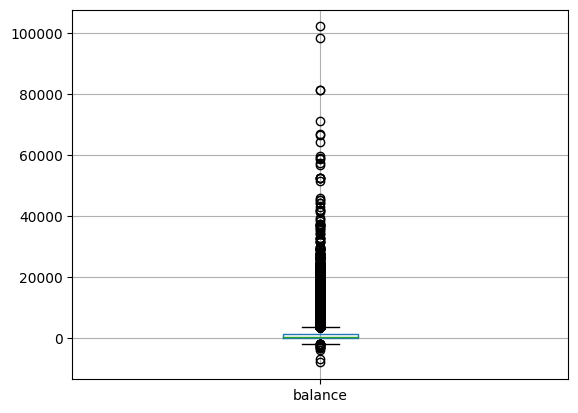

In [ ]:
boxplot = df.boxplot(column=['balance'])  

In [ ]:
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")
      
 
    #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

    IndexL_Outlier = df[data < Lower_fence ].index  
    IndexH_Outlier = df[data > Higher_fence].index

    print(f'\nBEFORE dropping Outlier we have rows = {df.shape[0]}, and columns = {df.shape[1]}')

    df.drop(IndexL_Outlier,inplace=True)
    df.drop(IndexH_Outlier,inplace=True)

    print(f'AFTER dropping Outlier we have rows = {df.shape[0]}, and columns = {df.shape[1]}')

In [ ]:
outliers(df['balance'])

Lower fence is = -1962.0
Higher fence is = 3462.0

BEFORE dropping Outlier we have rows = 45211, and columns = 19
AFTER dropping Outlier we have rows = 40482, and columns = 19


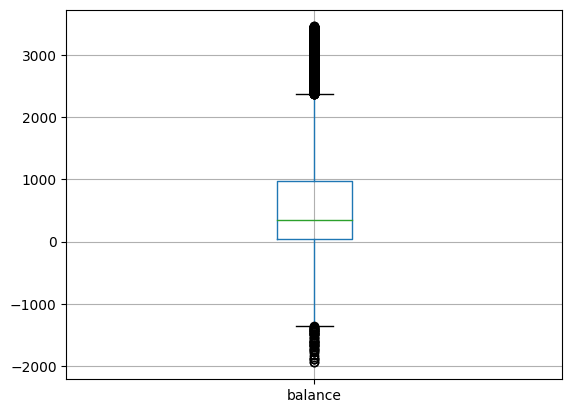

In [ ]:
boxplot = df.boxplot(column=['balance'])  

In [ ]:
df['y'].value_counts()

no     35960
yes     4522
Name: y, dtype: int64

In [ ]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, no need to try to
# understand every line.
# Code reference Hands on Machine Learning with Scikit Learn and Tensorflow by Aurelien Geron.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

### Convert categorical columns into dummy variables.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "campaign", "pdays", "balance", "duration"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

### Process unbalance data

In [ ]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()
X = df_copy.drop('y', axis=1)
label = df_copy['y']
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42, stratify=label)


X_train = preprocess_pipeline.fit_transform(X_train)
X_test = preprocess_pipeline.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)

## **Classification Models**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

def train_ml_model(model_type):
    if model_type == 'xgb':
        model = XGBClassifier(learning_rate=0.01, n_estimators=2000, max_depth=6)
    elif model_type == 'rf':
        model = RandomForestClassifier(n_estimators=1000, max_depth=6)
    elif model_type == 'lr':
      model = LogisticRegression(penalty='l1', solver='saga', class_weight='balanced')
    elif model_type == 'mlp':
      model = MLPClassifier(hidden_layer_sizes=50, activation='logistic')
    model.fit(X_train, y_train)

    return model

In [ ]:
model_xgb = train_ml_model('xgb')
model_rf = train_ml_model('rf')
model_lr = train_ml_model('lr')
model_mlp = train_ml_model('mlp')

## **Evaluation Model**

### Model Selection

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
def model_evaluate(model, X, y):
  y_pred = model.predict(X)
  print(classification_report(y, y_pred))

  cm = confusion_matrix(y, y_pred, labels=model.classes_)
  cm_dis = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
  cm_dis.plot()
  plt.show()

#### XGBoost

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7193
           1       0.64      0.47      0.54       904

    accuracy                           0.91      8097
   macro avg       0.79      0.72      0.75      8097
weighted avg       0.90      0.91      0.91      8097



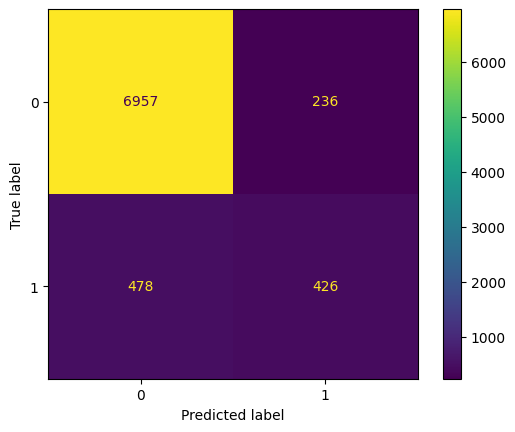

In [ ]:
model_evaluate(model_xgb, X_test, y_test)

#### Random Forest

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7193
           1       0.80      0.15      0.26       904

    accuracy                           0.90      8097
   macro avg       0.85      0.57      0.60      8097
weighted avg       0.89      0.90      0.87      8097



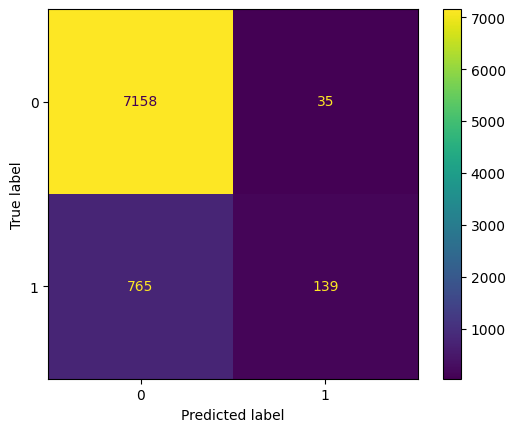

In [ ]:
model_evaluate(model_rf, X_test, y_test)

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7193
           1       0.41      0.83      0.54       904

    accuracy                           0.85      8097
   macro avg       0.69      0.84      0.73      8097
weighted avg       0.91      0.85      0.87      8097



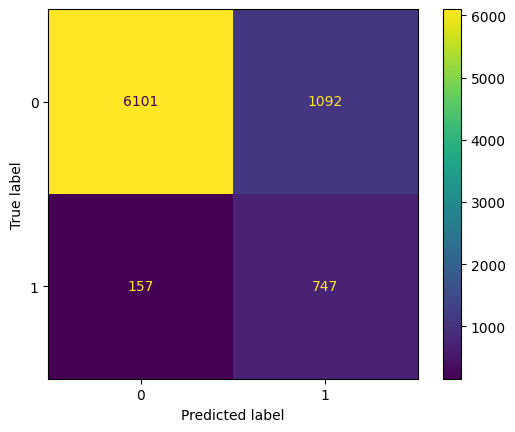

In [ ]:
model_evaluate(model_lr, X_test, y_test)

#### MLP Classifier

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7193
           1       0.64      0.48      0.55       904

    accuracy                           0.91      8097
   macro avg       0.79      0.72      0.75      8097
weighted avg       0.90      0.91      0.91      8097



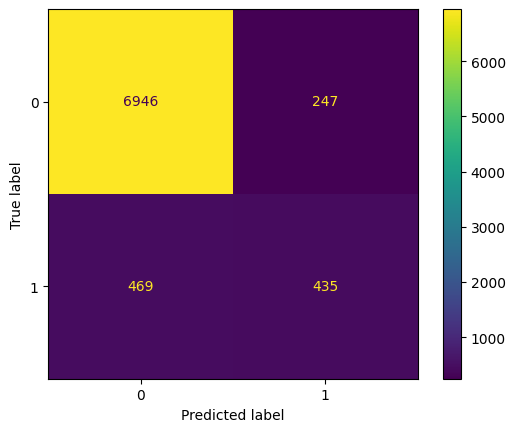

In [ ]:
model_evaluate(model_mlp, X_test, y_test)

### Recall Precision Tradeoff

In [ ]:
y_prob = model_lr.predict_proba(X_train)[:, 1]

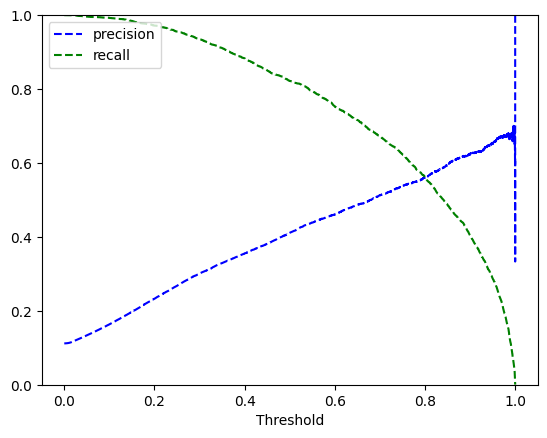

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, threshold = precision_recall_curve(y_train, y_prob)
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(precisions, recalls, threshold)
plt.show()

Nhận xét: Nếu cắt ngưỡng mức 0.8 thì đạt được điểm trung hòa cho cả precision and recall nhưng mục tiêu của mình là độ phủ tốt nhất nên lấy ngưỡng 0.5 là phù hợp nhất

### ROC Curve (Receiver Operating Characteristic)

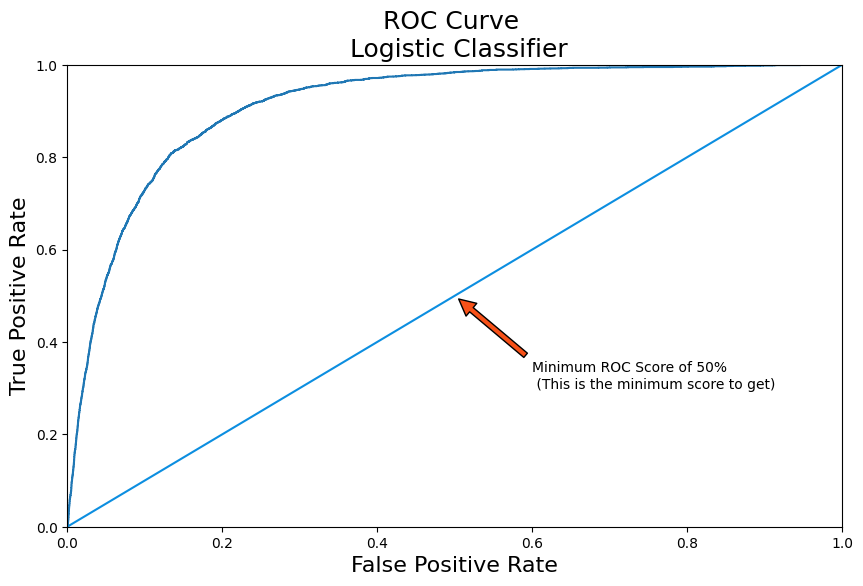

Auc: 0.9130849789245682


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_prob)
auc = roc_auc_score(y_train, y_prob)
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Logistic Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()
print(f"Auc: {auc}")

### Features Importance

Feature ranking:
1. feature 11 (0.566765)
2. feature 8 (0.132482)
3. feature 13 (0.076579)
4. feature 15 (0.066561)
5. feature 6 (0.066544)
6. feature 10 (0.052468)
7. feature 14 (0.012111)
8. feature 5 (0.009353)
9. feature 12 (0.006145)
10. feature 9 (0.006107)
11. feature 0 (0.002786)
12. feature 3 (0.001978)
13. feature 1 (0.000120)
14. feature 7 (0.000000)
15. feature 4 (0.000000)
16. feature 2 (0.000000)


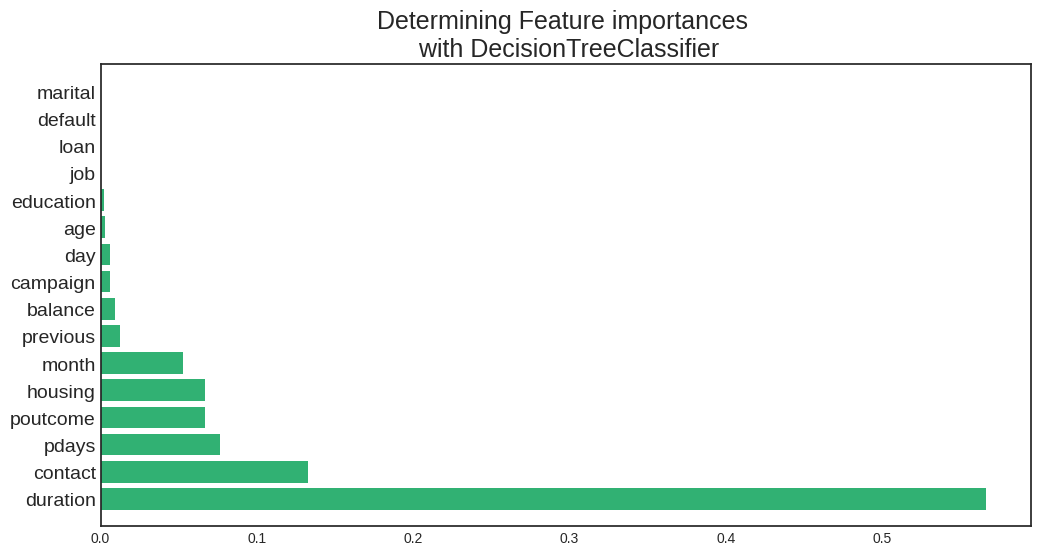

In [ ]:
from sklearn import tree
term_deposits = df.copy()
plt.style.use('seaborn-white')

# Convert the columns into categorical variables
term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['poutcome'] = term_deposits['poutcome'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes

target_name = 'y'
X = term_deposits.drop(['y', 'Balance', 'Duration'], axis=1)


label=term_deposits[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    
)

tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = term_deposits.drop('y', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

## Kết luận cho các chiến dịch Marketing tiếp theo:
1.	**Tháng**: Đa số khách hàng được liên hệ vào tháng 5 nhưng tỷ lệ thất bại lên đến 93.3%, những tháng 12,9,3,10 ít liên hệ nhất nhưng tỉ lệ người đang ký cao nhất. Do đó nên tập trung liên hệ vào những tháng này.
2.	**Tính thời vụ**: Khách hàng tiềm năng đã chọn cách đặt tiền gửi kỳ hạn trong các mùa mùa thu và mùa đông. Chiến dịch tiếp thị tiếp theo sẽ tập trung hoạt động của nó điều chỉnh các mùa này.
3.	**Gọi điện**: Một chính sách nên được thực hiện nêu rõ rằng không nên áp dụng quá 3 cuộc gọi cho cùng một khách hàng tiềm năng để tiết kiệm thời gian và công sức trong việc có được khách hàng tiềm năng mới. Hơn nữa, dữ liệu cho thấy càng gọi cho cùng một khách hàng tiềm năng, thì càng có khả năng họ sẽ từ chối mở một khoản tiền gửi có kỳ hạn.
4.	**Độ tuổi**: Chiến dịch tiếp thị tiếp theo của ngân hàng nên nhắm mục tiêu đến khách hàng tiềm năng ở độ tuổi 20 trở xuống và 60 tuổi trở lên. 
5.	**Nghề nghiệp**: Khách hàng tiềm năng là sinh viên hoặc đã nghỉ hưu có nhiều khả năng đăng ký tiền gửi có kỳ hạn nhất. Các cá nhân đã nghỉ hưu, có xu hướng có nhiều tiền gửi có kỳ hạn hơn để kiếm được một số tiền mặt thông qua các khoản thanh toán lãi.
6.	**Phát triển bảng câu hỏi trong các cuộc gọi**: Vì thời lượng của cuộc gọi là tính năng tương quan tích cực nhất với việc khách hàng tiềm năng có mở khoản tiền gửi có kỳ hạn hay không, bằng cách cung cấp một bảng câu hỏi thú vị cho khách hàng tiềm năng trong các cuộc gọi, thời lượng cuộc trò chuyện có thể tăng lên từ đó dẫn đến tăng xác suất đăng ký tiền gửi có kỳ hạn, và do đó tăng hiệu quả cho chiến dịch tiếp thị tiếp theo mà ngân hàng sẽ vượt quá.
7.**Duration**: Nhắm mục tiêu nhóm mục tiêu có duration trên trung bình, có khả năng cao nhóm mục tiêu này sẽ mở tài khoản tiền gửi có kỳ hạn. Khả năng nhóm này sẽ mở tài khoản tiền gửi có kỳ hạn ở mức 78%, khá cao. Điều này sẽ cho phép tỷ lệ thành công của chiến dịch tiếp thị tiếp theo sẽ rất thành công.
